In [1]:
%matplotlib inline

# 01. Predict with pre-trained SSD models

This article shows how to play with pre-trained SSD models with only a few
lines of code.

First let's import some necessary libraries:



In [2]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

## Load a pretrained model

Let's get an SSD model trained with 512x512 images on Pascal VOC
dataset with ResNet-50 V1 as the base model. By specifying
``pretrained=True`



In [3]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/Users/nizam/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


100%|██████████| 132723/132723 [00:25<00:00, 5232.66KB/s]


In [6]:
im_fname = utils.download('http://localhost:8889/view/Downloads/street.jpg')
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 512)


## Inference and display

The forward function will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



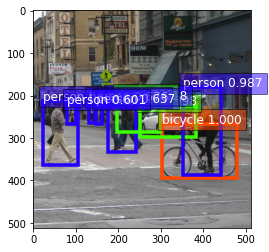

In [7]:
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()